In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [102]:
# Supress wanrings
warnings.filterwarnings("ignore")

In [103]:
# Importing the dataset
df = pd.read_csv('/Users/velmurugan/Downloads/Employee_Salaries.csv')

In [104]:
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


#### Handling Null values and duplicate values

In [106]:
# No.of null values
df.isna().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64

In [107]:
# since less than 1% values are null we can remove these rows

df.dropna(inplace=True)

In [108]:
df.isna().sum()

Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
Grade              0
dtype: int64

In [109]:
# check for duplicates

duplicate_no = df.duplicated().sum()
print(f"No of duplicate entries: {duplicate_no}")

No of duplicate entries: 609


In [110]:
# percentage of duplicates in the dataframe

duplicate_percent= ((duplicate_no/len(df))*100).round(2)
duplicate_percent

5.94

In [111]:
# There are more than 5% duplicates, lets investigate further

duplicates = df[df.duplicated()]
duplicates.head(10)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
17,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,117424.0000,0.0,0.00,N25
18,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,117424.0000,0.0,0.00,N25
225,ABS,Alcohol Beverage Services,ABS 85 Goshen Crossing,M,19695.5000,0.0,0.00,12
512,CAT,County Attorney's Office,CAT 30 Finance and Procurement,F,78947.0000,0.0,3357.62,N16
517,CAT,County Attorney's Office,CAT 30 Finance and Procurement,F,158802.0000,0.0,0.00,N32
518,CAT,County Attorney's Office,CAT 30 Finance and Procurement,F,158802.0000,0.0,0.00,N32
565,CAT,County Attorney's Office,CAT 30 Support Services,F,78947.0000,0.0,0.00,N16
589,CCL,County Council,CCL 01 Council Central Staff,F,134500.0000,0.0,2185.69,N28
592,CCL,County Council,CCL 01 Council Central Staff,F,175873.0000,0.0,0.00,M2
610,CCL,County Council,CCL 01 Council Central Staff,F,131114.6781,0.0,0.00,N32


In [112]:
# Identical rows are there they can skew the data

df.drop_duplicates(inplace=True)
print(f"No of duplicates: {df.duplicated().sum()}")

No of duplicates: 0


### EDA

In [113]:
df.shape

(9649, 8)

In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Base_Salary,9649.0,90530.121059,30463.741275,18257.5,71080.5601,87328.00,107934.00,292000.00
Overtime_Pay,9649.0,8616.459808,16895.363879,0.0,0.0000,526.71,10275.50,227428.99
Longevity_Pay,9649.0,1577.012563,3259.647168,0.0,0.0000,0.00,1352.53,20279.46


#### Outliers and skewness

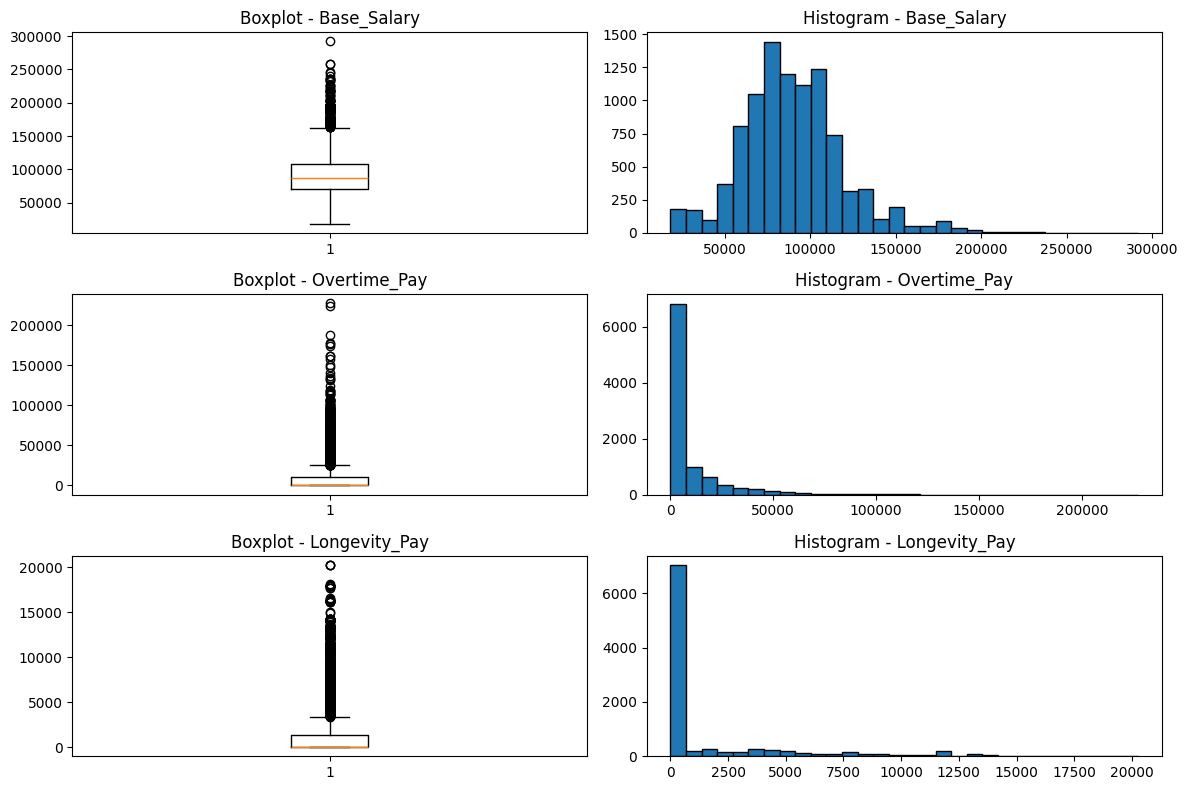

In [115]:
# using visualisation techniques to identify the distribution and outliers

numeric_columns = ['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']

fig, axs = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12, 8))

for i, column in enumerate(numeric_columns):
    # Boxplot
    axs[i, 0].boxplot(df[column])
    axs[i, 0].set_title(f'Boxplot - {column}')
    
    # Histogram
    axs[i, 1].hist(df[column], bins=30, edgecolor='black')
    axs[i, 1].set_title(f'Histogram - {column}')
    
plt.tight_layout()
plt.show()

#### Since this is salary and pay It is possible to say some employees may get high salary when comparing to others. So no need to treat the outliers.

### Analysis based on columns in the dataset

In [116]:
unique_departments = df['Department'].unique()
print(f"The number of unique values in the Department column is: {len(unique_departments)}")

The number of unique values in the Department column is: 42


#### Department

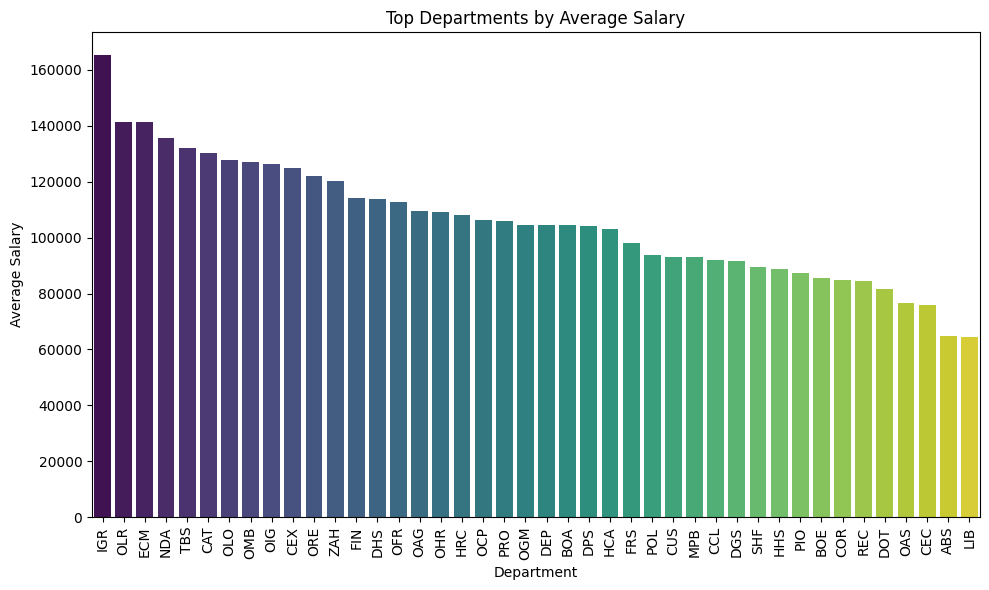

In [117]:
avg_salary_per_dept = df.groupby('Department')['Base_Salary'].mean().reset_index()

# Sort departments by average salary in descending order 
top_depts = avg_salary_per_dept.sort_values(by='Base_Salary', ascending=False)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Base_Salary', data=top_depts, palette='viridis')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.title('Top Departments by Average Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### The average salary varies based on the department

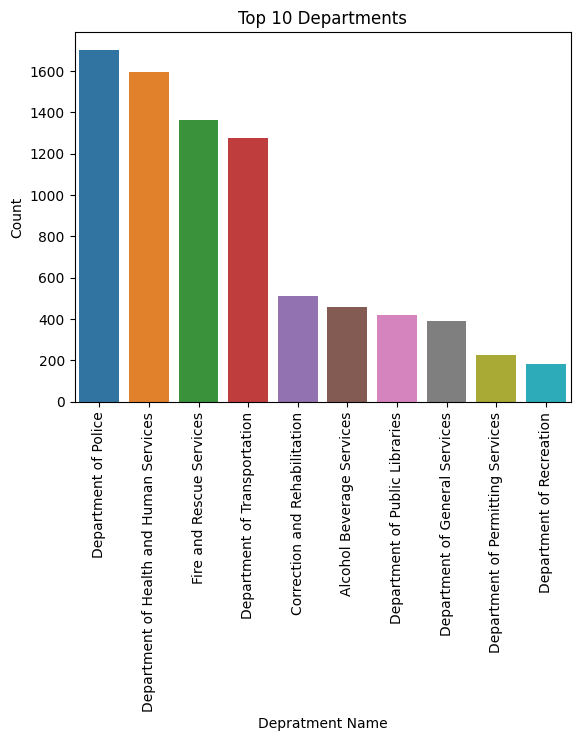

In [118]:
# Visualize count of occurrences for top 10 values in the Department_Name column

top_departments = df['Department_Name'].value_counts().head(10).reset_index()

palette = sns.color_palette("tab10", 10)
sns.barplot(data=top_departments, x='Department_Name', y='count', palette=palette)
plt.title('Top 10 Departments')
plt.xlabel('Depratment Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##### Police,Health and Human service, Fire and Rescue service and Transportation Department has the highest no of employees


#### Division

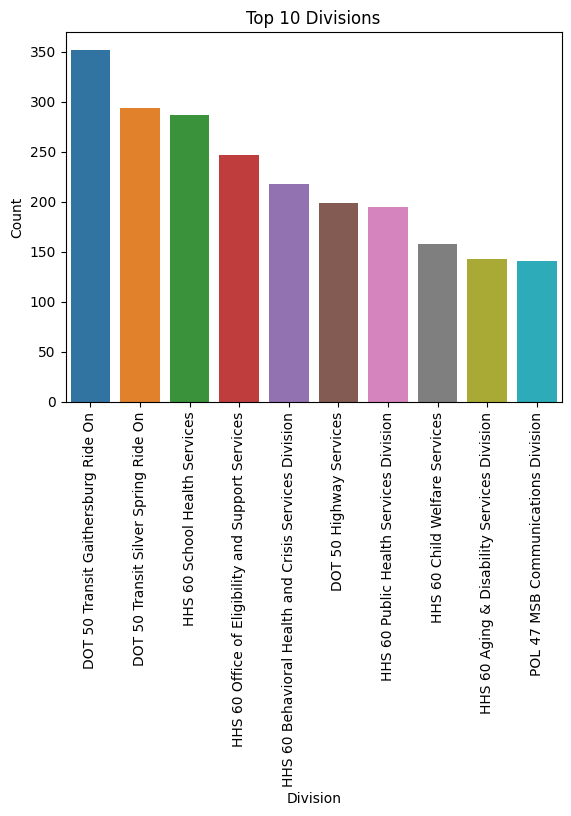

In [119]:
top_10_divisions = df['Division'].value_counts().head(10).reset_index()

sns.barplot(data=top_10_divisions, x='Division', y='count', palette=palette)
plt.title('Top 10 Divisions')
plt.xlabel('Division')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Gender

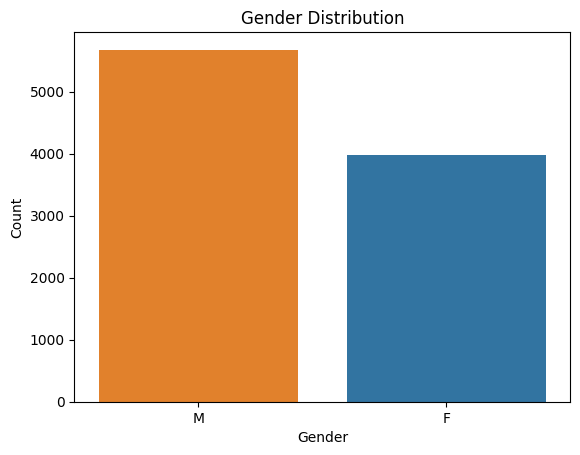

,Count,Percentage
Gender,,
M,5674,58.8
F,3975,41.2


In [120]:
# Visualizing Gender Distribution 

gender_counts = df['Gender'].value_counts()
gender_percentages = (df['Gender'].value_counts(normalize=True) * 100).round(1)

sns.countplot(data = df, x='Gender', palette=[palette[1], palette[0]])
plt.ylabel("Count")
plt.title('Gender Distribution')
plt.show()
    
# combine counts and percentages into a DataFrame
res_df = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percentages
})
res_df

#### No of male employees are 17 percent higher than Female employees

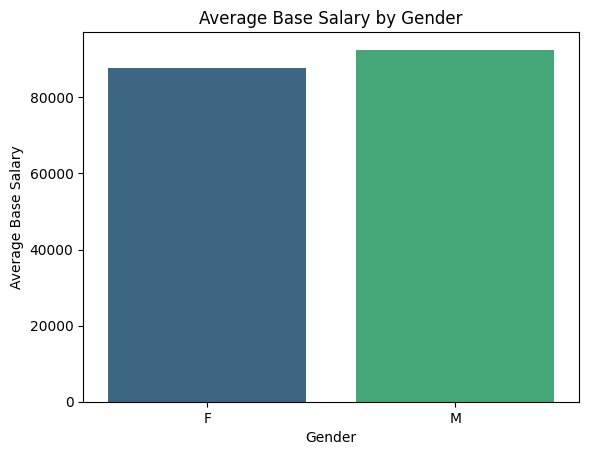

In [121]:
# Gender pay gap

gender_gap = df.groupby('Gender')['Base_Salary'].mean()
gender_gap_df = gender_gap.reset_index()

sns.barplot(data=gender_gap_df, x='Gender', y='Base_Salary', palette='viridis')
plt.title('Average Base Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Base Salary')
plt.show()

#### Salary of male employees slightly higher than Female employees

#### Grade

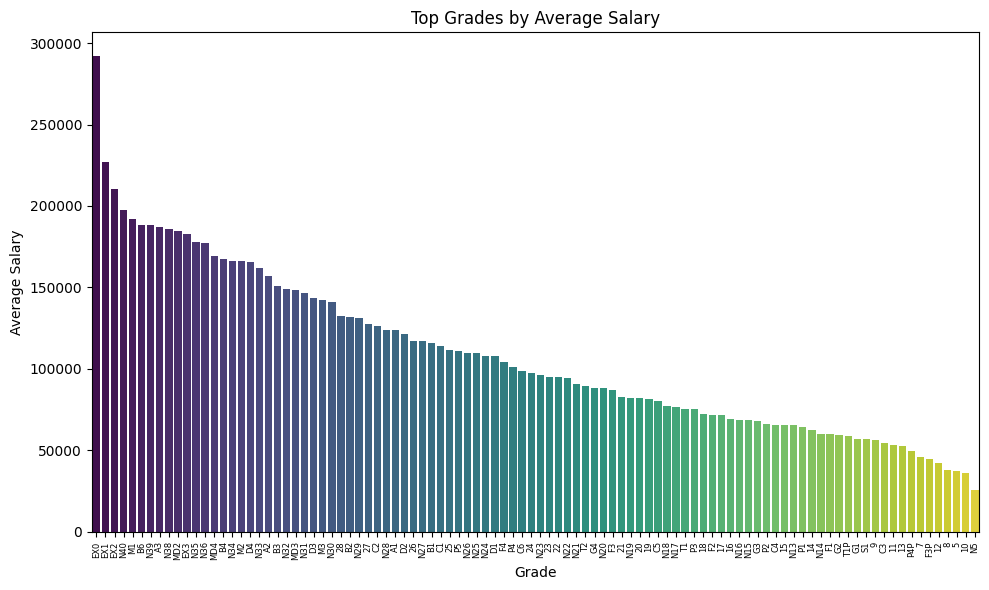

In [122]:
Grade = df.groupby('Grade')['Base_Salary'].mean().reset_index()

# Sort departments by average salary in descending order 
Top_Grades = Grade.sort_values(by='Base_Salary', ascending=False)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Grade', y='Base_Salary', data=Top_Grades, palette='viridis')
plt.xlabel('Grade')
plt.ylabel('Average Salary')
plt.title('Top Grades by Average Salary')
plt.xticks(rotation=90)
plt.xticks(fontsize=6)
plt.tight_layout()
plt.show()

#### Salary of an employee varies based on Grade

### Feature Engineering and Encoding

In [123]:
df.Department.unique()

array(['ABS', 'BOA', 'BOE', 'CAT', 'CCL', 'CEC', 'CEX', 'COR', 'CUS',
       'DEP', 'DGS', 'DHS', 'DOT', 'DPS', 'ECM', 'FIN', 'FRS', 'HCA',
       'HHS', 'HRC', 'IGR', 'LIB', 'MPB', 'NDA', 'OAG', 'OAS', 'OCP',
       'OFR', 'OGM', 'OHR', 'OIG', 'OLO', 'OLR', 'OMB', 'ORE', 'PIO',
       'POL', 'PRO', 'REC', 'SHF', 'TBS', 'ZAH'], dtype=object)

In [124]:
df.Department_Name.unique()

array(['Alcohol Beverage Services', 'Board of Appeals Department',
       'Board of Elections', "County Attorney's Office", 'County Council',
       'Community Engagement Cluster', 'Offices of the County Executive',
       'Correction and Rehabilitation',
       'Community Use of Public Facilities',
       'Department of Environmental Protection',
       'Department of General Services',
       'Office of Emergency Management and Homeland Security',
       'Department of Transportation',
       'Department of Permitting Services', 'Ethics Commission',
       'Department of Finance', 'Fire and Rescue Services',
       'Department of Housing and Community Affairs',
       'Department of Health and Human Services',
       'Office of Human Rights',
       'Office of Intergovernmental Relations Department',
       'Department of Public Libraries',
       'Merit System Protection Board Department',
       'Non-Departmental Account', 'Office of Agriculture',
       'Office of Animal Services'

#### Department Name is just the abbreviation of Department 

In [125]:
# Dropping Department_Name column

df.drop(columns=['Department_Name'],inplace=True)

In [126]:
df.head()

,Department,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [127]:
df.Division.nunique()

624

#### Hierarchy present in the departments and Grade in Avg salary. So using ordianl encoder

In [128]:
ordian_encoder = OrdinalEncoder()
df.Department = ordian_encoder.fit_transform(df[['Department']])
df.Grade = ordian_encoder.fit_transform(df[['Grade']])

#### For other categorical columns using label encoder

In [129]:
label_encoder = LabelEncoder()
df.Gender = label_encoder.fit_transform(df['Gender'])
df.Division = label_encoder.fit_transform(df['Division'])

In [130]:
df.tail()

,Department,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
10284,40.0,620,1,134500.0000,0.0,0.00,75.0
10285,40.0,620,1,158802.0000,0.0,0.00,79.0
10288,41.0,622,0,84365.5529,0.0,0.00,65.0
10289,41.0,623,0,98228.0000,0.0,1596.27,68.0
10290,41.0,623,0,177976.3100,0.0,0.00,82.0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10290
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Department     9649 non-null   float64
 1   Division       9649 non-null   int64  
 2   Gender         9649 non-null   int64  
 3   Base_Salary    9649 non-null   float64
 4   Overtime_Pay   9649 non-null   float64
 5   Longevity_Pay  9649 non-null   float64
 6   Grade          9649 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 603.1 KB


<Axes: >

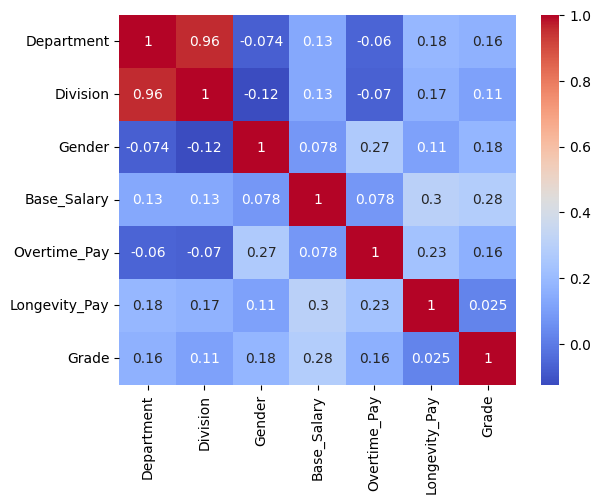

In [132]:
df_cols = df.columns

corelation = df[df_cols].corr()

sns.heatmap(corelation,annot=True,cmap='coolwarm')

#### No independant feature has high corelation with dependant feature. Department attribute has high corelation with Division.

### Train Test Split and Model Building

In [133]:
# Build regression model 

def regg_model(df,model,label_column):
    x = df.drop(label_column,axis=1).values
    y = df[label_column].values

    # Partioning the data for training and testing
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=3)

    algo = model().fit(x_train,y_train)
    y_train_pred = algo.predict(x_train)
    y_test_pred = algo.predict(x_test)

    # Train data metrics

    train_data_mse = mean_squared_error(y_train,y_train_pred)
    train_data_rmse = np.sqrt(train_data_mse)
    train_data_mae = mean_absolute_error(y_train,y_train_pred)
    train_data_r2 =r2_score(y_train,y_train_pred)

    # Test data metrics

    test_data_mse = mean_squared_error(y_test,y_test_pred)
    test_data_rmse = np.sqrt(test_data_mse)
    test_data_mae = mean_absolute_error(y_test,y_test_pred)
    test_data_r2 =r2_score(y_test,y_test_pred)

    train_data_metrics = {"model":model.__name__,
                          "Data":"Training Data",
                          "MSE":train_data_mse,
                          "RMSE":train_data_rmse,
                          "MAE":train_data_mae,
                          "R2_Score":train_data_r2}
    
    test_data_metrics ={"model":model.__name__,
                          "Data":"Testing Data",
                          "MSE":test_data_mse,
                          "RMSE":test_data_rmse,
                          "MAE":test_data_mae,
                          "R2_Score":test_data_r2}
    
    return train_data_metrics,test_data_metrics,y_test,y_test_pred
    

## Model Evaluation

### Linear Regression Report

In [134]:
lin_reg_train,lin_reg_test,y_test,y_pred_reg = regg_model(df=df,model=LinearRegression,label_column="Base_Salary")

#### Train Data

In [135]:
for key,val in lin_reg_train.items():
    print(key,' : ', val)

model  :  LinearRegression
Data  :  Training Data
MSE  :  767613047.5028739
RMSE  :  27705.83056872459
MAE  :  20143.85455185949
R2_Score  :  0.16851470604291863


#### Test Data

In [136]:
for key,val in lin_reg_test.items():
    print(key,' : ', val)

model  :  LinearRegression
Data  :  Testing Data
MSE  :  764100943.5797454
RMSE  :  27642.375867130984
MAE  :  20588.91332454567
R2_Score  :  0.19298543948483804


### Decision Tree Report

In [137]:
desicion_tree_train,decision_tree_test,y_test,y_pred_tree = regg_model(df=df,model=DecisionTreeRegressor,label_column="Base_Salary")

#### Train Data

In [138]:
for key,val in desicion_tree_train.items():
    print(key,' : ', val)

model  :  DecisionTreeRegressor
Data  :  Training Data
MSE  :  16480428.888511075
RMSE  :  4059.609450244084
MAE  :  1212.0805822702514
R2_Score  :  0.9821482525557891


#### Test Data

In [139]:
for key,val in decision_tree_test.items():
    print(key,' : ', val)

model  :  DecisionTreeRegressor
Data  :  Testing Data
MSE  :  142019207.85820192
RMSE  :  11917.1812043873
MAE  :  7118.971358230665
R2_Score  :  0.8500046759823994


### Random Forest Report

In [140]:
rand_for_train,rand_for_test,y_test,y_pred_forest = regg_model(df=df,model=RandomForestRegressor,label_column="Base_Salary")

#### Train Data

In [141]:
for key,val in rand_for_train.items():
    print(key,' : ', val)

model  :  RandomForestRegressor
Data  :  Training Data
MSE  :  27753594.127232958
RMSE  :  5268.168004841243
MAE  :  3052.3929689179186
R2_Score  :  0.969937059503719


#### Test Data

In [142]:
for key,val in rand_for_test.items():
    print(key,' : ', val)

model  :  RandomForestRegressor
Data  :  Testing Data
MSE  :  102018427.45560445
RMSE  :  10100.417192156196
MAE  :  6383.780685119423
R2_Score  :  0.8922519896234886


### Gradient Boost

In [143]:
gb_train,gb_test,y_test,y_pred_boost = regg_model(df=df,model=GradientBoostingRegressor,label_column="Base_Salary")

#### Train Data

In [144]:
for key,val in gb_train.items():
    print(key,' : ', val)

model  :  GradientBoostingRegressor
Data  :  Training Data
MSE  :  143295497.8798961
RMSE  :  11970.609753888735
MAE  :  8611.426318990574
R2_Score  :  0.8447810396592488


#### Test Data

In [145]:
for key,val in gb_test.items():
    print(key,' : ', val)

model  :  GradientBoostingRegressor
Data  :  Testing Data
MSE  :  141462140.19918114
RMSE  :  11893.785780784063
MAE  :  8697.291095667942
R2_Score  :  0.8505930298063271


### Though Decision Tree has higher R2 score for training data, the R2 score for test data is lower than Random Forest Regressor. Random Forest have  good R2 score for both training and test data

##### Visualising the acutual and predicted values

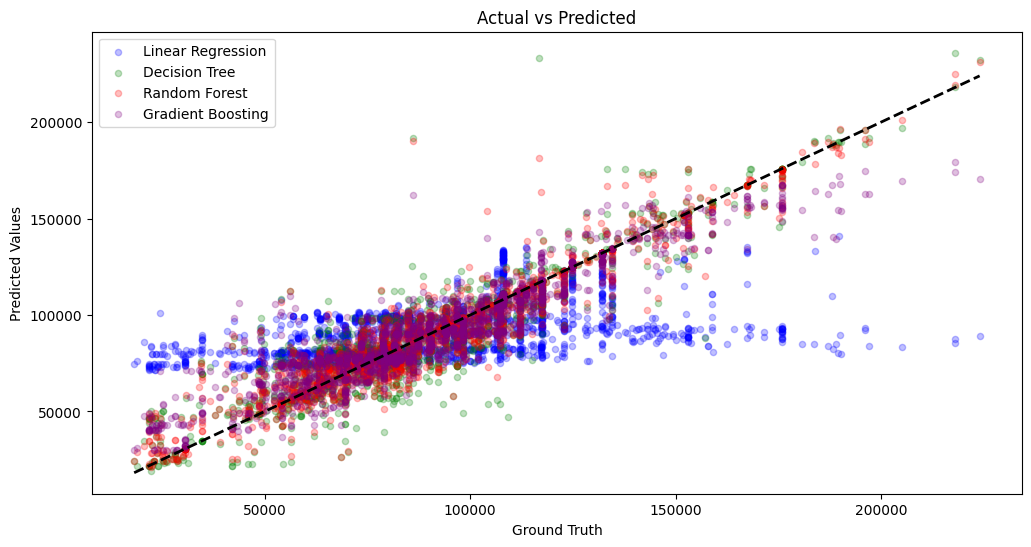

In [146]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_reg, label='Linear Regression', color='blue', s=20,alpha=0.25)
plt.scatter(y_test, y_pred_tree, label='Decision Tree', color='green', s=20,alpha=0.25)
plt.scatter(y_test, y_pred_forest, label='Random Forest',color='red', s=20, alpha=0.25)
plt.scatter(y_test, y_pred_boost, label='Gradient Boosting',color='purple', s=20, alpha=0.25)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()